In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
import sklearn
from sklearn.decomposition import PCA
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import PolynomialFeatures
from xgboost import XGBRegressor


In [2]:
sales_df = pd.read_csv("./data/car_purchasing.csv", encoding = "ISO-8859-1")

In [3]:
sales_df.columns

Index(['customer name', 'customer e-mail', 'country', 'gender', 'age',
       'annual Salary', 'credit card debt', 'net worth',
       'car purchase amount'],
      dtype='object')

In [4]:
sales_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 9 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   customer name        500 non-null    object 
 1   customer e-mail      500 non-null    object 
 2   country              500 non-null    object 
 3   gender               500 non-null    int64  
 4   age                  500 non-null    float64
 5   annual Salary        500 non-null    float64
 6   credit card debt     500 non-null    float64
 7   net worth            500 non-null    float64
 8   car purchase amount  500 non-null    float64
dtypes: float64(5), int64(1), object(3)
memory usage: 35.3+ KB


In [5]:
sales_df.describe()

,gender,age,annual Salary,credit card debt,net worth,car purchase amount
count,500.000000,500.000000,500.000000,500.000000,500.000000,500.000000
mean,0.506000,46.241674,62127.239608,9607.645049,431475.713625,44209.799218
std,0.500465,7.978862,11703.378228,3489.187973,173536.756340,10773.178744
min,0.000000,20.000000,20000.000000,100.000000,20000.000000,9000.000000
25%,0.000000,40.949969,54391.977195,7397.515792,299824.195900,37629.896040
50%,1.000000,46.049901,62915.497035,9655.035568,426750.120650,43997.783390
75%,1.000000,51.612263,70117.862005,11798.867487,557324.478725,51254.709517
max,1.000000,70.000000,100000.000000,20000.000000,1000000.000000,80000.000000


In [6]:
# Determine the Correlation Matrix of the numeric values in the data frame
sales_df_numeric = sales_df.select_dtypes(include=[np.number])

In [7]:
sales_df_correlation_matrix = sales_df_numeric.corr()

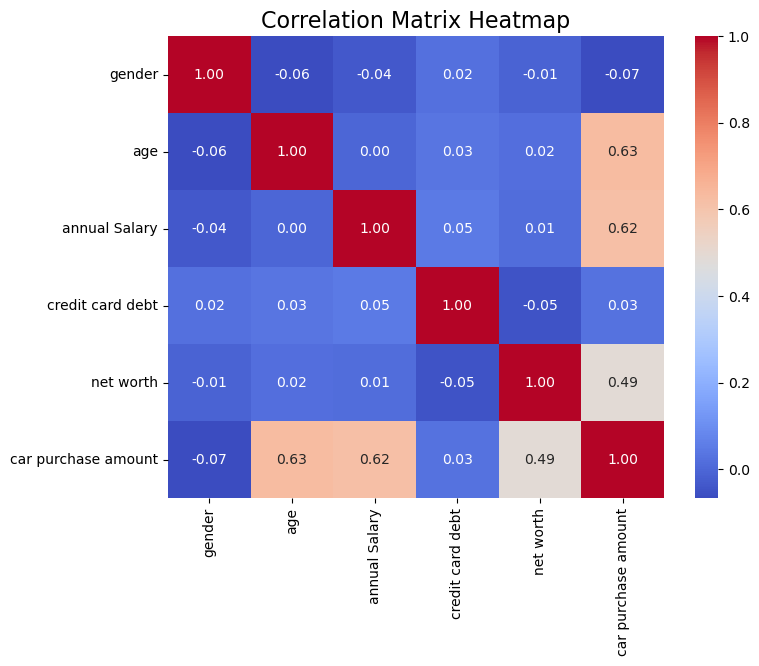

In [33]:
plt.figure(figsize=(8, 6))
sns.heatmap(
    sales_df_correlation_matrix, annot=True, fmt=".2f", cmap="coolwarm", cbar=True
)
plt.title("Correlation Matrix Heatmap", fontsize=16)
plt.show()


In [9]:
set(sales_df.columns)-set(sales_df_numeric.columns)

{'country', 'customer e-mail', 'customer name'}

In [10]:
sales_df_numeric_country = sales_df.drop(columns=['customer e-mail', 'customer name'])

In [11]:
sales_df_numeric_country['country'].unique()

array(['Bulgaria', 'Belize', 'Algeria', 'Cook Islands', 'Brazil',
       'Liberia', 'Syria', 'Czech Republic', 'Armenia', 'Somalia',
       'Sint Maarten', 'Greenland', 'Nicaragua', 'Palestine, State of',
       'United Arab Emirates', 'Gabon', 'Tokelau', 'Portugal', 'Chad',
       'Iraq', 'Sudan', 'Angola', 'Nigeria', 'Madagascar', 'Macedonia',
       'Oman', 'Colombia', 'Namibia', 'Denmark', 'Dominican Republic',
       'Costa Rica', 'Botswana', 'Saint Pierre and Miquelon', 'France',
       'Senegal', 'Cambodia', 'Suriname', 'Turkey', 'Ethiopia',
       'French Guiana', 'Bhutan', 'Georgia', 'Mozambique', 'Nauru',
       'Timor-Leste', 'Djibouti', 'Argentina', 'Taiwan', 'Åland Islands',
       'Turks and Caicos Islands', 'Samoa', 'Vanuatu', 'Mongolia',
       'Sri Lanka', 'Guinea-Bissau', 'Egypt', 'Slovenia', 'Benin',
       'Cape Verde', 'Paraguay', 'Laos', 'Iceland', 'Viet Nam',
       'Marshall Islands', 'Germany', 'Kyrgyzstan', 'Mauritius', 'Gambia',
       'Reunion', 'Jordan', 'S

In [34]:
sales_df_numeric_country[
    (
        sales_df_numeric_country["country"].isin(
            [
                "Germany",
                "United Kingdom (Great Britain)",
                "United States",
                "Australia",
                "Japan",
                "India",
            ]
        )
    )
]


,country,gender,age,annual Salary,credit card debt,net worth,car purchase amount
66,Germany,0,55.270306,62262.94845,11785.879190,301026.2206,48104.11184
117,Japan,0,34.681961,84171.16719,12719.644150,244310.5736,41451.71843
223,United States,1,37.893649,79368.91741,13501.926590,761935.5177,56457.74038
310,India,1,57.105079,56066.07685,5235.759900,497876.2478,51866.48719
351,United Kingdom (Great Britain),0,55.256078,59486.27073,6515.336778,228434.0508,44424.07681
379,United States,1,43.576495,47230.92278,4421.153379,558001.0241,37259.84386
395,Australia,1,35.337876,61723.00613,9913.194941,291897.4057,30757.65726
468,India,0,43.304685,68921.40213,8120.204455,515012.2804,47979.48549


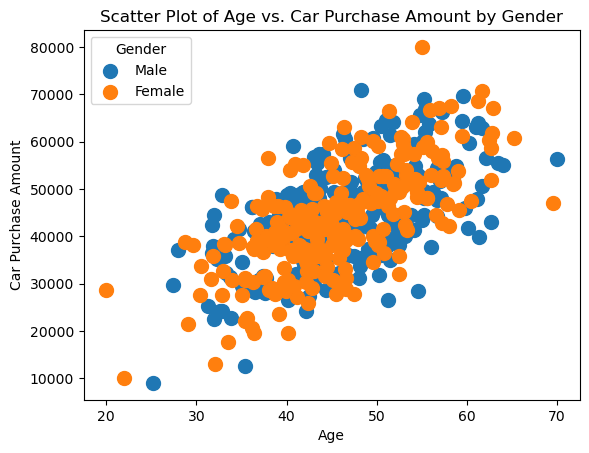

In [36]:
# Assuming sales_df_numeric is your DataFrame and gender_labels is defined as:
gender_labels = {0: "Male", 1: "Female"}

# Plot each gender separately
for gender in sales_df_numeric["gender"].unique():
    subset = sales_df_numeric[sales_df_numeric["gender"] == gender]
    plt.scatter(
        subset["age"], subset["car purchase amount"], label=gender_labels[gender], s=100
    )

# Add labels and title
plt.xlabel("Age")
plt.ylabel("Car Purchase Amount")
plt.title("Scatter Plot of Age vs. Car Purchase Amount by Gender")

# Add a legend
plt.legend(title="Gender")

# Show the plot
plt.show()


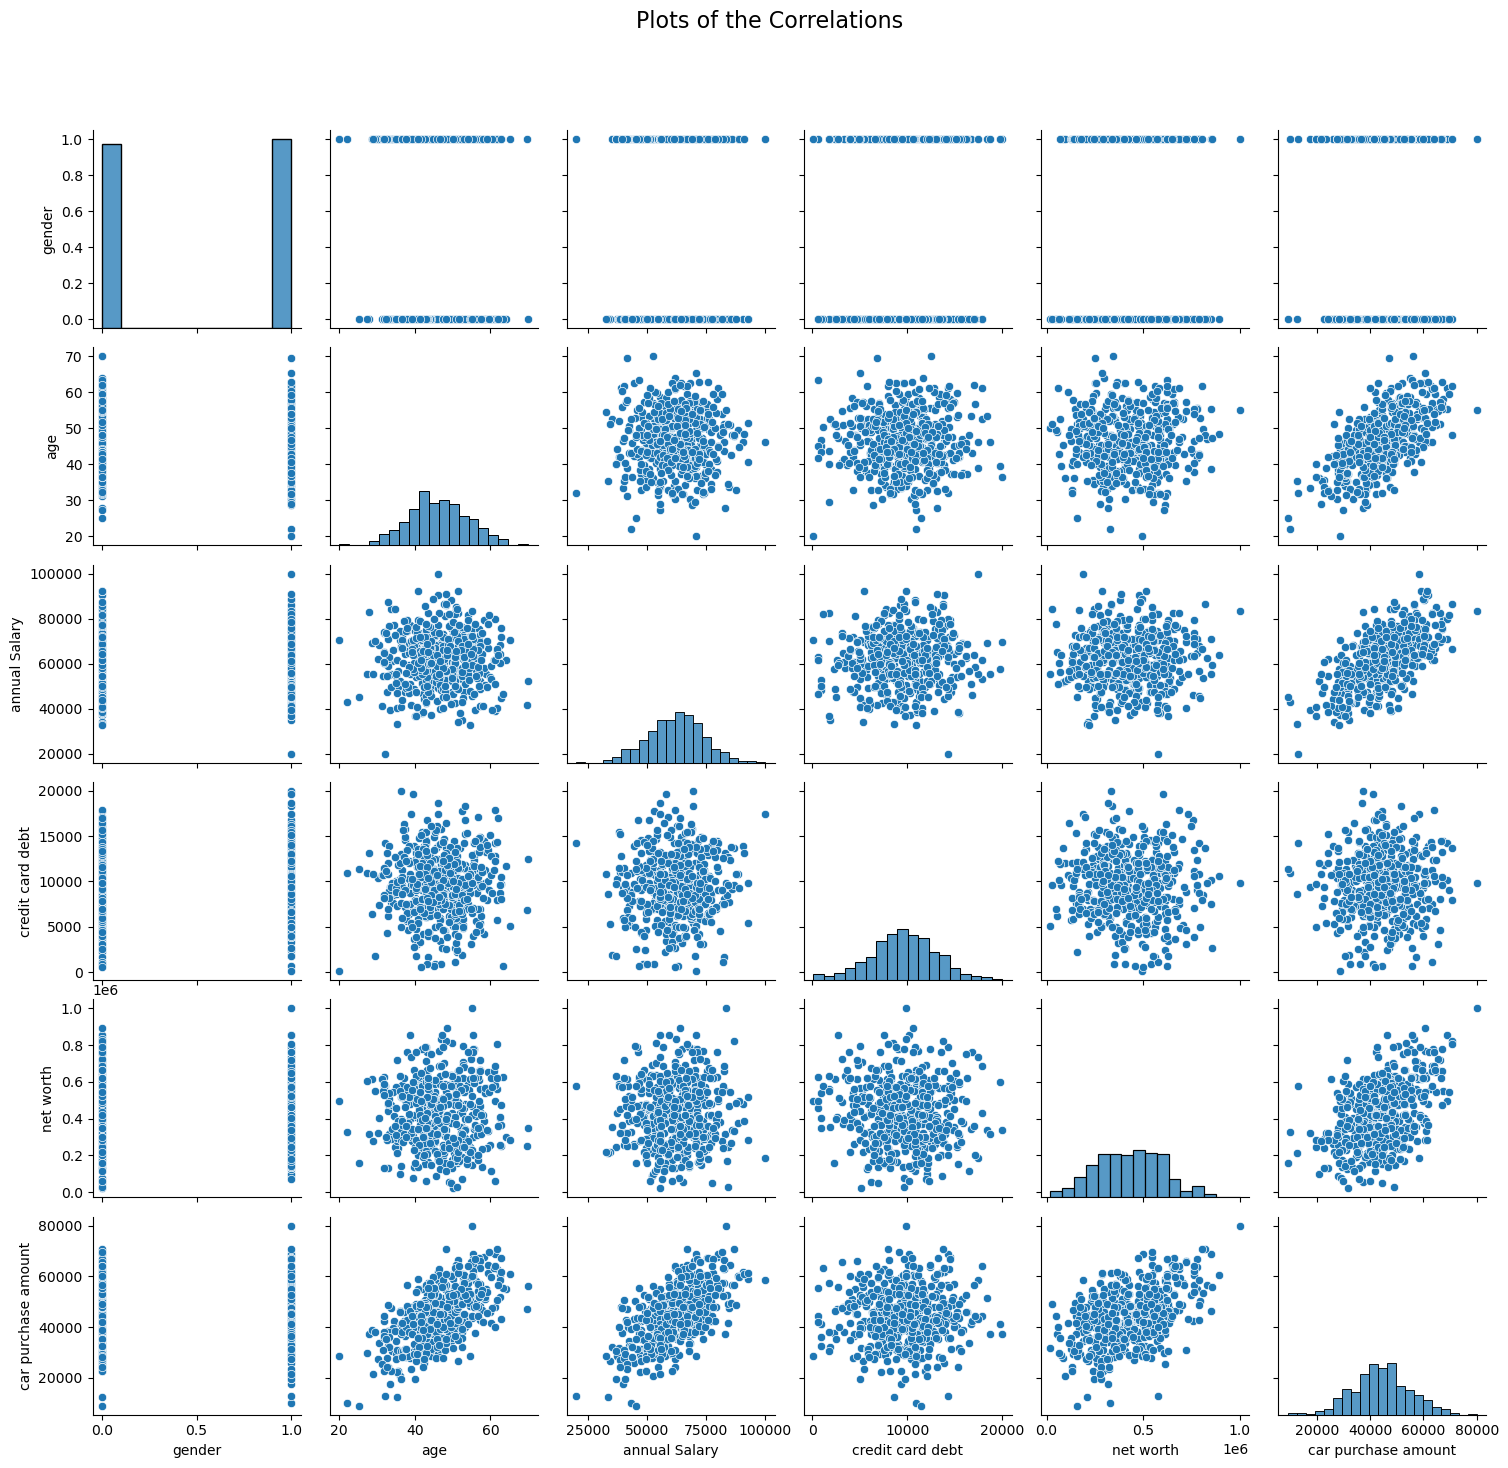

In [37]:
# Create the PairGrid
g = sns.PairGrid(sales_df_numeric)

# Map the upper triangle to scatter plots
g.map_upper(sns.scatterplot)

# Map the lower triangle to scatter plots
g.map_lower(sns.scatterplot)

# Map the diagonal to histograms
g.map_diag(sns.histplot, kde=False)

# Adjust the layout
plt.subplots_adjust(top=0.9)
g.fig.suptitle("Plots of the Correlations", fontsize=16)

# Show the plot
plt.show()

In [15]:
X,y = sales_df_numeric.values[:,:5], sales_df_numeric.values[:,5]

In [39]:
X_train, X_test = (
    X[: int(0.7 * sales_df_numeric.values.shape[0])],
    X[int(0.7 * sales_df_numeric.values.shape[0]) :],
)
y_train, y_test = (
    y[: int(0.7 * sales_df_numeric.values.shape[0])],
    y[int(0.7 * sales_df_numeric.values.shape[0]) :],
)

In [40]:
pca = PCA(n_components=2)
principal_components = pca.fit_transform(X)

In [41]:
pca_df = pd.DataFrame(data=principal_components, columns=['PC1', 'PC2'])

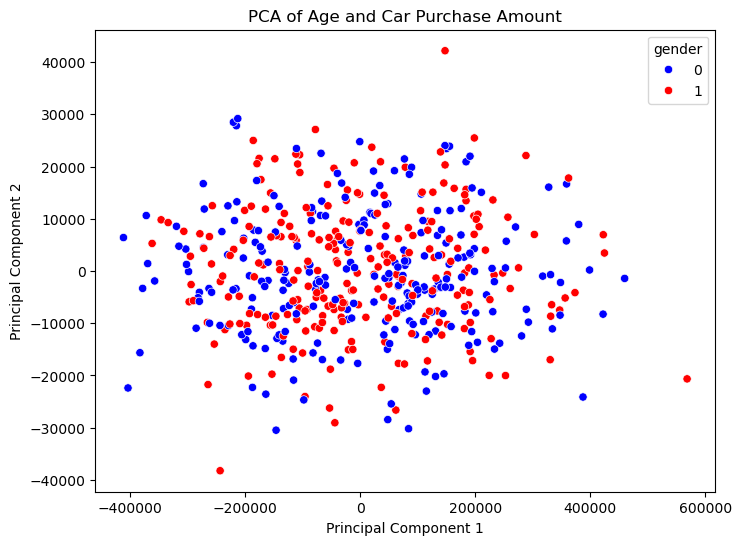

In [43]:
# Add the gender column to the PCA DataFrame
pca_df["gender"] = sales_df_numeric["gender"]

# Plot the PCA result
plt.figure(figsize=(8, 6))
sns.scatterplot(
    data=pca_df, x="PC1", y="PC2", hue="gender", palette={0: "blue", 1: "red"}
)

# Add labels and title
plt.xlabel("Principal Component 1")
plt.ylabel("Principal Component 2")
plt.title("PCA of Age and Car Purchase Amount")

# Show the plot with the legend
plt.show()

In [44]:
pca.explained_variance_ratio_

array([0.99507391, 0.00452591])

In [45]:
model_xgboost_linear = XGBRegressor(booster='gblinear')

In [46]:
model_xgboost_tree = XGBRegressor(booster='gbtree',n_estimators=20)

In [47]:
model_xgboost_linear.fit(X_train, y_train)

XGBRegressor(base_score=None, booster='gblinear', callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=None, n_jobs=None,
             num_parallel_tree=None, random_state=None, ...)

In [24]:
model_xgboost_tree.fit(X_train, y_train)

XGBRegressor(base_score=None, booster='gbtree', callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=20, n_jobs=None,
             num_parallel_tree=None, random_state=None, ...)

In [25]:
model_xgboost_tree.score(X_test,y_test)

0.9442283160217725

In [26]:
model_xgboost_linear.score(X_test,y_test)

0.727621987543948

In [49]:
# Determine the performence of the XGBoost Algorithm for different numbers of estimators
mse_xgboost = []
for i in range(10,110,10):
    model_xgboost = XGBRegressor(n_estimators=i)
    model_xgboost.fit(X_train,y_train)
    prediction_xgboost = model_xgboost.predict(X_test)
    mse_xgboost.append(mean_squared_error(y_pred=prediction_xgboost,y_true=y_test))

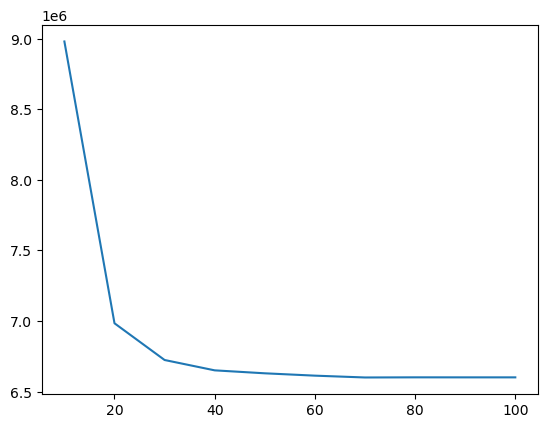

In [50]:
plt.plot(list(range(10,110,10)),mse_xgboost)

In [51]:
mse_xgboost.index(min(mse_xgboost))

6

In [52]:
# Determine the performence of the model for different degrees of the polynomial
mse_poly = []
for i in range(10):
    model_poly =  make_pipeline(PolynomialFeatures(degree=i), LinearRegression())
    model_poly.fit(X_train,y_train)
    y_pred_model_poly = model_poly.predict(X_test)
    mse_model_poly = mean_squared_error(y_pred=y_pred_model_poly,y_true=y_test)
    mse_poly.append(mse_model_poly)

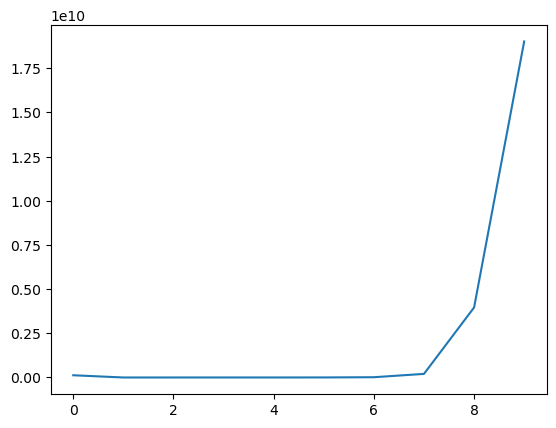

In [53]:
plt.plot(mse_poly)

In [32]:
mse_poly

[125242819.26836564,
 1.8290174817312936,
 2.0006474429621046,
 41604.447558474625,
 437106.2931054698,
 2237568.0404206547,
 14742676.237424716,
 202872357.66373384,
 3960462364.9023232,
 19010614338.579357]